___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Check the system and requairement 

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print('You can safely ignore this.')

You can safely ignore this.


In [2]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
# Get tensorflow version
import tensorflow as tf

In [4]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("This session will run on CPU.")

GPU support is enabled for this session.


In [5]:
# Get more information about gpu (if available)
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

Mon Oct 30 19:39:32 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.92                 Driver Version: 545.92       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   49C    P3              34W / 170W |   2495MiB / 12288MiB |     35%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Improt Libraries & Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv("Churn_Modelling.csv")

# EDA and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [9]:
df.shape

(10000, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# drop Unnecessary columns
df.drop(['RowNumber','CustomerId','Surname','Geography','Gender'],axis=1, inplace=True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.000,1,1,1,101348.880,1
1,608,41,1,83807.860,1,0,1,112542.580,0
2,502,42,8,159660.800,3,1,0,113931.570,1
3,699,39,1,0.000,2,0,0,93826.630,0
4,850,43,2,125510.820,1,1,1,79084.100,0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [15]:
df.describe(exclude=['int64']).T

,count,mean,std,min,25%,50%,75%,max
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [16]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

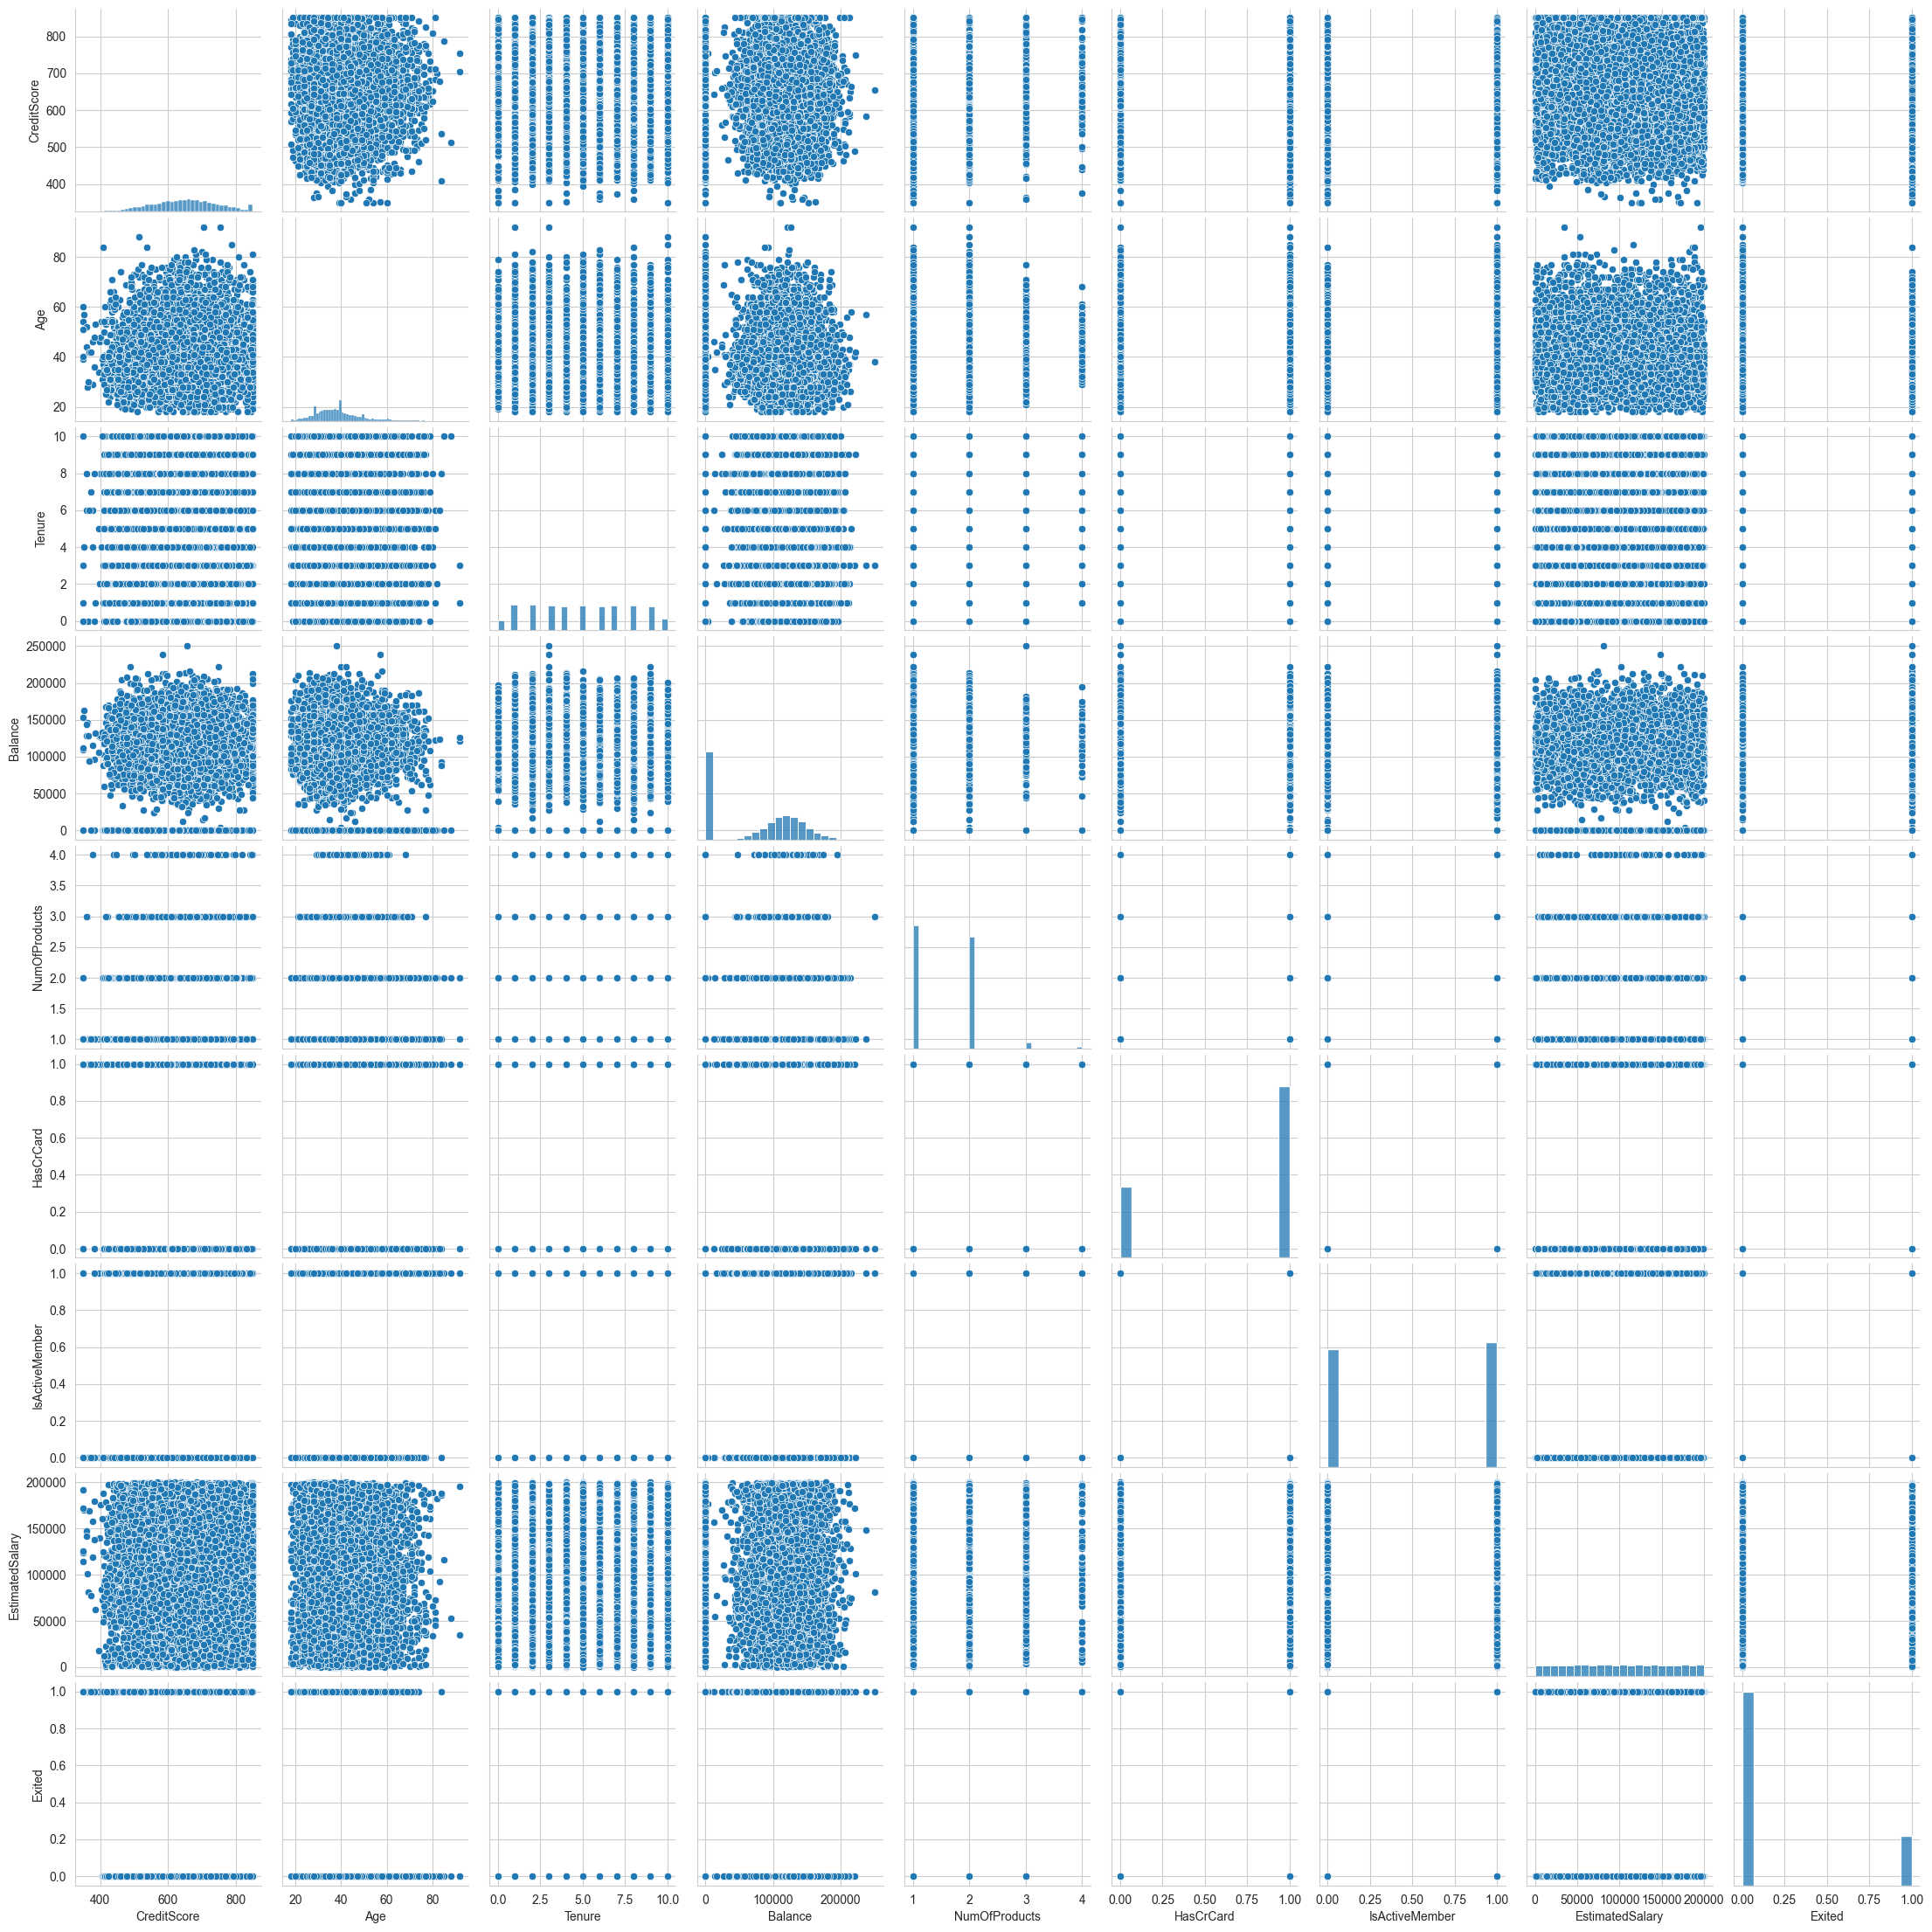

In [17]:
# Plot the relationships in a dataset
sns.pairplot(df);

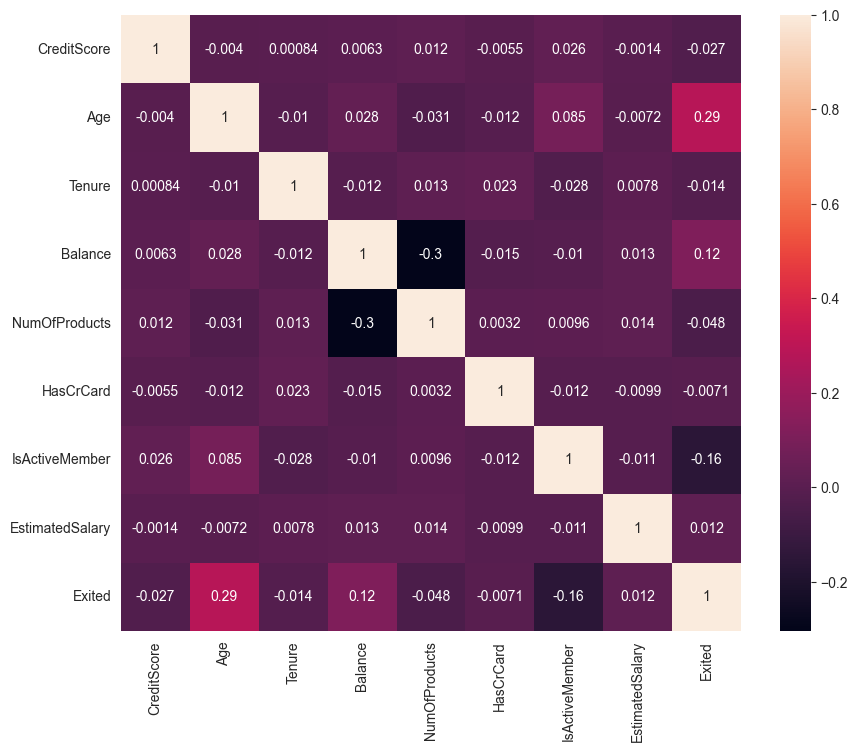

In [18]:
# see the correlations between the columns 
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

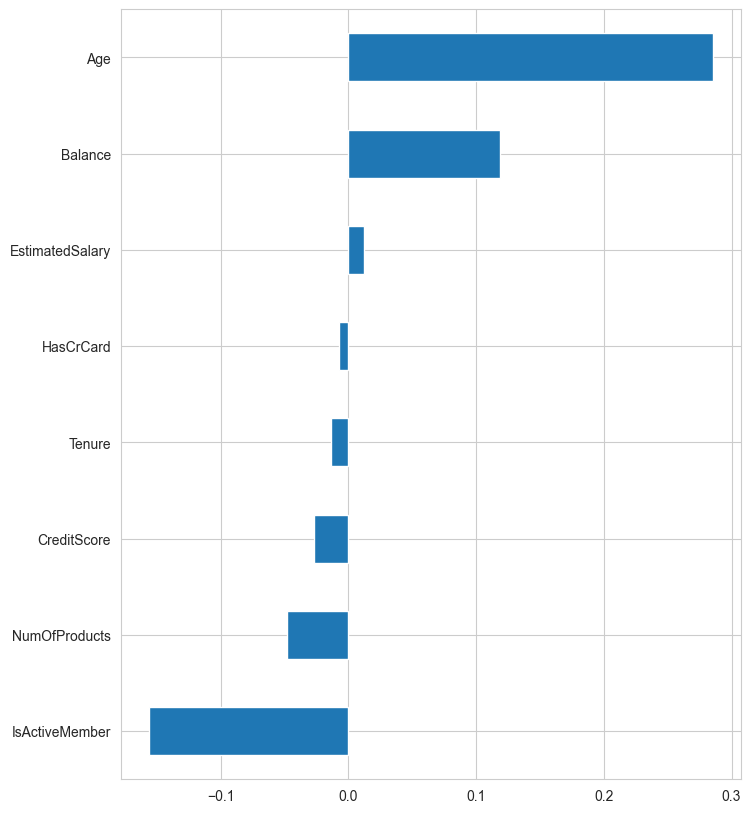

In [19]:
# presents the correlations between the "Exited" coluumn and all other columns in the 'df'
plt.figure(figsize=(8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh");

In [20]:
# Counting unique values
unique_counts = df.nunique()
print(unique_counts)

CreditScore         460
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


#### I want to understand the structure of a `Exited` column

In [21]:
# sign the class 1
c1 = df[df["Exited"] == 1].sort_values(by="Exited", ascending=False)
c1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.000,1,1,1,101348.880,1
6524,651,35,1,163700.780,3,1,1,29583.480,1
6581,576,71,6,140273.470,1,1,1,193135.250,1
6575,794,55,6,115796.700,1,1,0,160526.360,1
6571,595,46,10,0.000,1,1,0,73489.150,1
...,...,...,...,...,...,...,...,...,...
3193,659,49,1,0.000,1,1,0,116249.720,1
3185,652,45,9,110827.490,1,1,1,153383.540,1
3184,667,55,9,154393.430,1,1,1,137674.960,1
3180,678,60,10,117738.810,1,1,0,147489.760,1


In [22]:
value_counts_1 = df[df["Exited"] == 1]["Exited"].value_counts()
print(value_counts_1)

Exited
1    2037
Name: count, dtype: int64


In [23]:
# sign the class 0
c0 = df[df["Exited"] == 0].sort_values(by="Exited", ascending=False)
c0

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,41,1,83807.860,1,0,1,112542.580,0
6682,640,29,5,197200.040,2,1,0,141453.620,0
6696,567,48,3,0.000,1,1,0,55362.450,0
6695,646,33,2,0.000,2,0,0,198208.000,0
6694,651,37,9,114453.580,1,0,1,175820.910,0
...,...,...,...,...,...,...,...,...,...
3360,844,38,7,111501.660,1,1,1,119333.380,0
3359,739,60,4,0.000,1,1,1,51637.670,0
3357,658,29,5,75395.530,2,0,1,54914.920,0
3356,687,41,10,134318.210,2,1,1,198064.520,0


In [24]:
value_counts_0 = df[df["Exited"] == 0]["Exited"].value_counts()
print(value_counts_0)

Exited
0    7963
Name: count, dtype: int64


In [25]:
 # The difference between classes 
differ =  7963 - 2037
differ

5926

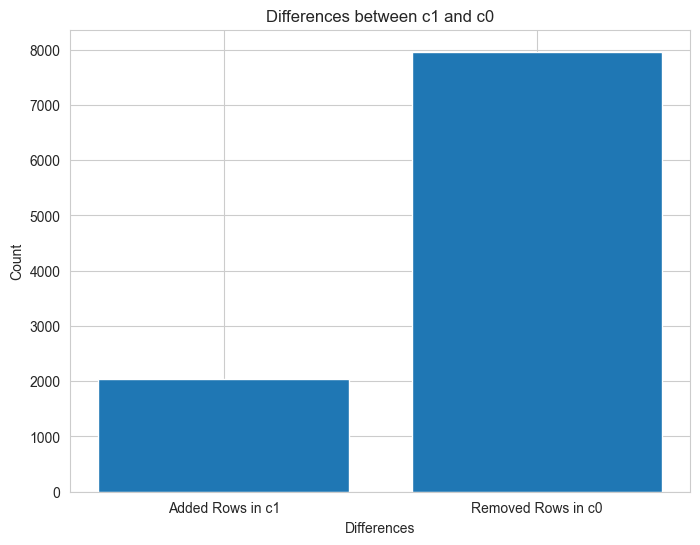

In [26]:
# class 1 and class 0 Differences in visually 
added_rows_c1 = c1[~c1.isin(c0.to_dict(orient='list')).all(axis=1)]
removed_rows_c0 = c0[~c0.isin(c1.to_dict(orient='list')).all(axis=1)]
plt.figure(figsize=(8, 6))
plt.bar(['Added Rows in c1', 'Removed Rows in c0'], [len(added_rows_c1), len(removed_rows_c0)])
plt.xlabel('Differences')
plt.ylabel('Count')
plt.title('Differences between c1 and c0')
plt.show()

## Outlier

In [27]:
# Checking for outliers
q1 = df.quantile(0.20)
q3 = df.quantile(0.80)
iqr = q3 - q1
# printing outlier from the dataset
print(iqr)

CreditScore          169.000
Age                   15.000
Tenure                 6.000
Balance           133710.358
NumOfProducts          1.000
HasCrCard              1.000
IsActiveMember         1.000
EstimatedSalary   118785.990
Exited                 1.000
dtype: float64


In [28]:
# Checking for number of outliers
outliers = (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))
print(outliers.sum())

CreditScore          0
Age                173
Tenure               0
Balance              0
NumOfProducts       60
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


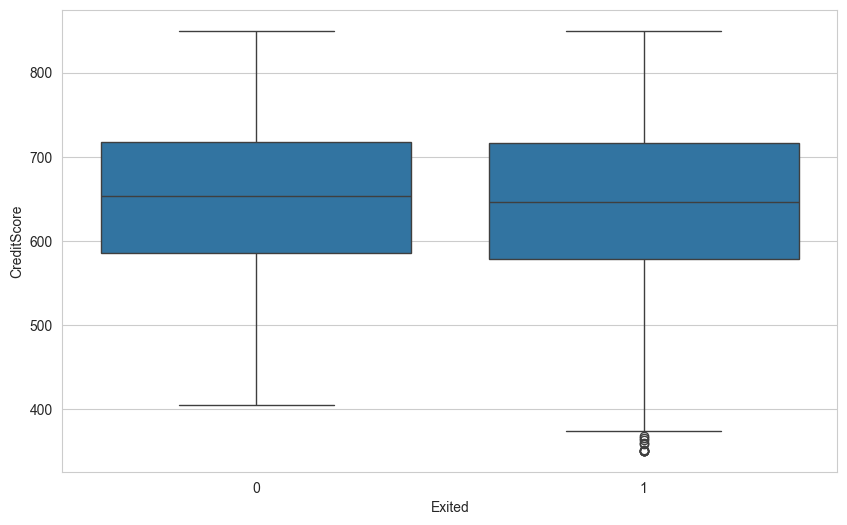

In [29]:
sns.boxplot(x="Exited", y="CreditScore", data=df)
plt.show()

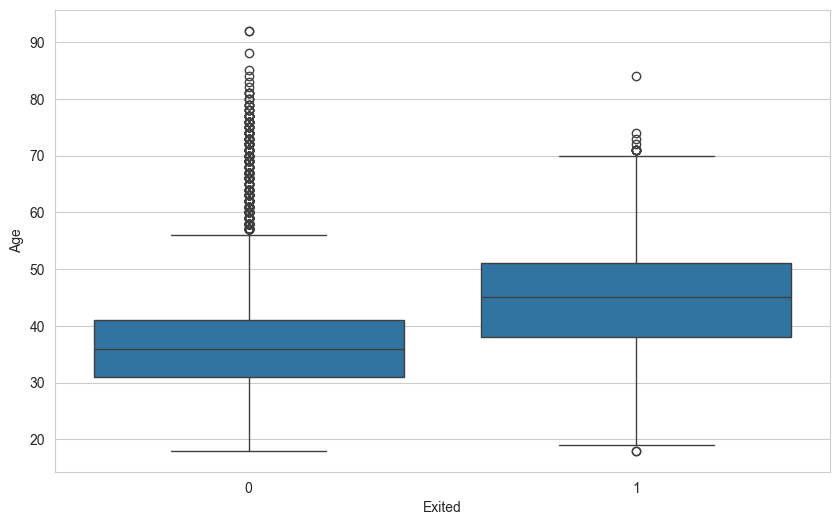

In [30]:
sns.boxplot(x="Exited", y="Age", data=df)
plt.show()

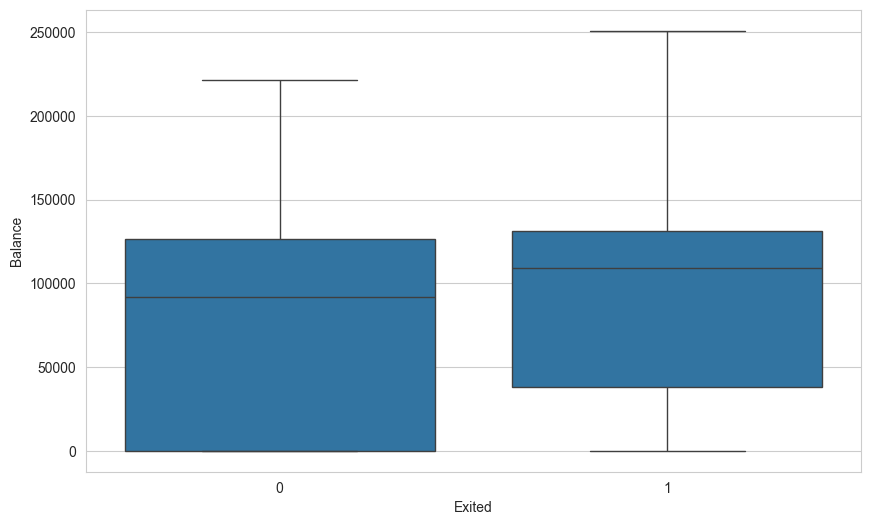

In [31]:
sns.boxplot(x="Exited", y="Balance", data=df)
plt.show()

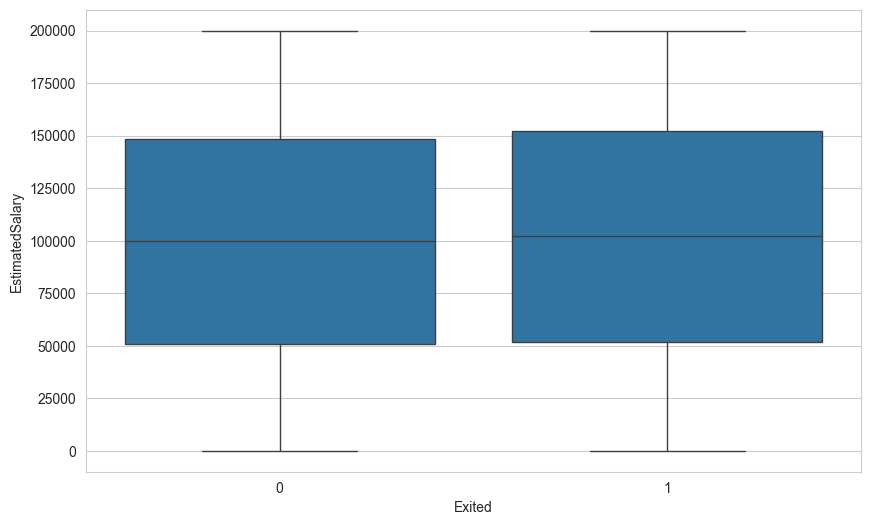

In [32]:
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [102]:
pip install transformers

     ---------------------------------------- 0.0/121.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/121.5 kB ? eta -:--:--
     --------- --------------------------- 30.7/121.5 kB 435.7 kB/s eta 0:00:01
     ------------------------ ------------ 81.9/121.5 kB 657.6 kB/s eta 0:00:01
     ------------------------------------ 121.5/121.5 kB 647.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------- ----------- 41.0/57.6 kB 1.9 MB/s eta 0:00:01
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.7 MB 1.9 MB/s eta 0:00:05
   ---------------------------------------- 0.1/7.7 MB 1.3 MB/s eta 0:00:06
    ----

In [138]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
import keras

In [139]:
X = df.drop("Exited", axis=1)
y = df["Exited"].values

In [140]:
np.random.seed = (97)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15)
np.random.seed = (97)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, test_size = 0.1)

In [141]:
X_train.shape

(9000, 8)

In [142]:
X_test.shape

(1500, 8)

In [143]:
X_val.shape

(1000, 8)

In [144]:
y_val.shape

(1000,)

In [145]:
cat_col = X_train.select_dtypes(include=['object', 'bool']).columns
encoder = OneHotEncoder(categories = "auto", sparse=False,handle_unknown="ignore")

In [146]:
transformers = [("cat", encoder, cat_col)]
col_transformer = ColumnTransformer(transformers=transformers,
                                    remainder='passthrough')

In [147]:
X_train = col_transformer.fit_transform(X_train)
X_train = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [149]:
np.random.seed = (97)
os.environ["TF_DETERMINISTIC_OPS"] = "1"
tf.keras.utils

<module 'keras.api._v2.keras.utils' from 'C:\\Users\\Admin\\anaconda0.3\\envs\\tensorflowgpu\\lib\\site-packages\\keras\\api\\_v2\\keras\\utils\\__init__.py'>

## without class_weigth

### Create The Model

In [44]:
import tensorflow as tf
import scikitplot as skplt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets, metrics
from sklearn.model_selection import cross_val_score, cross_validate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
seed = 97
os.environ[TF_OPS]
tf.keras.utils.set_random_seed(seed)

In [46]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ["Recall"])

In [47]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 200, verbose = 1)

Epoch 1/200
127/127 [==============================] - 3s 5ms/step - loss: 0.5415 - recall: 0.0152 - val_loss: 0.4969 - val_recall: 0.0000e+00
Epoch 2/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4956 - recall: 0.0000e+00 - val_loss: 0.4881 - val_recall: 0.0000e+00
Epoch 3/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4877 - recall: 0.0000e+00 - val_loss: 0.4806 - val_recall: 0.0000e+00
Epoch 4/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4789 - recall: 0.0000e+00 - val_loss: 0.4708 - val_recall: 0.0000e+00
Epoch 5/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4682 - recall: 0.0000e+00 - val_loss: 0.4582 - val_recall: 0.0055
Epoch 6/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4563 - recall: 0.0030 - val_loss: 0.4464 - val_recall: 0.0109
Epoch 7/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4458 - recall: 0.0345 - val_loss: 0.4365 - val_recall: 0.

127/127 [==============================] - 0s 3ms/step - loss: 0.3597 - recall: 0.3873 - val_loss: 0.3431 - val_recall: 0.4153
Epoch 60/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3598 - recall: 0.3915 - val_loss: 0.3445 - val_recall: 0.3880
Epoch 61/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3601 - recall: 0.3897 - val_loss: 0.3466 - val_recall: 0.4317
Epoch 62/200
127/127 [==============================] - 0s 4ms/step - loss: 0.3593 - recall: 0.3897 - val_loss: 0.3427 - val_recall: 0.4153
Epoch 63/200
127/127 [==============================] - 0s 4ms/step - loss: 0.3596 - recall: 0.3915 - val_loss: 0.3438 - val_recall: 0.4372
Epoch 64/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3592 - recall: 0.3909 - val_loss: 0.3434 - val_recall: 0.4208
Epoch 65/200
127/127 [==============================] - 0s 4ms/step - loss: 0.3599 - recall: 0.3885 - val_loss: 0.3450 - val_recall: 0.4645
Epoch 66/200
127/127 [===========

127/127 [==============================] - 0s 4ms/step - loss: 0.3544 - recall: 0.4036 - val_loss: 0.3388 - val_recall: 0.4809
Epoch 118/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3546 - recall: 0.4006 - val_loss: 0.3372 - val_recall: 0.4153
Epoch 119/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3548 - recall: 0.3970 - val_loss: 0.3362 - val_recall: 0.4481
Epoch 120/200
127/127 [==============================] - 0s 4ms/step - loss: 0.3543 - recall: 0.4012 - val_loss: 0.3357 - val_recall: 0.4754
Epoch 121/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3536 - recall: 0.4030 - val_loss: 0.3365 - val_recall: 0.4208
Epoch 122/200
127/127 [==============================] - 0s 4ms/step - loss: 0.3538 - recall: 0.3952 - val_loss: 0.3362 - val_recall: 0.4426
Epoch 123/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3543 - recall: 0.4018 - val_loss: 0.3365 - val_recall: 0.4699
Epoch 124/200
127/127 [====

127/127 [==============================] - 0s 3ms/step - loss: 0.3511 - recall: 0.4073 - val_loss: 0.3308 - val_recall: 0.4645
Epoch 176/200
127/127 [==============================] - 0s 4ms/step - loss: 0.3503 - recall: 0.4091 - val_loss: 0.3312 - val_recall: 0.4699
Epoch 177/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3502 - recall: 0.4012 - val_loss: 0.3313 - val_recall: 0.4590
Epoch 178/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3498 - recall: 0.4085 - val_loss: 0.3354 - val_recall: 0.4372
Epoch 179/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3498 - recall: 0.3964 - val_loss: 0.3318 - val_recall: 0.4208
Epoch 180/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3503 - recall: 0.4036 - val_loss: 0.3321 - val_recall: 0.4809
Epoch 181/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3500 - recall: 0.4018 - val_loss: 0.3324 - val_recall: 0.4481
Epoch 182/200
127/127 [====

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [49]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.542,0.015,0.497,0.000
1,0.496,0.000,0.488,0.000
2,0.488,0.000,0.481,0.000
3,0.479,0.000,0.471,0.000
4,0.468,0.000,0.458,0.005


<Axes: >

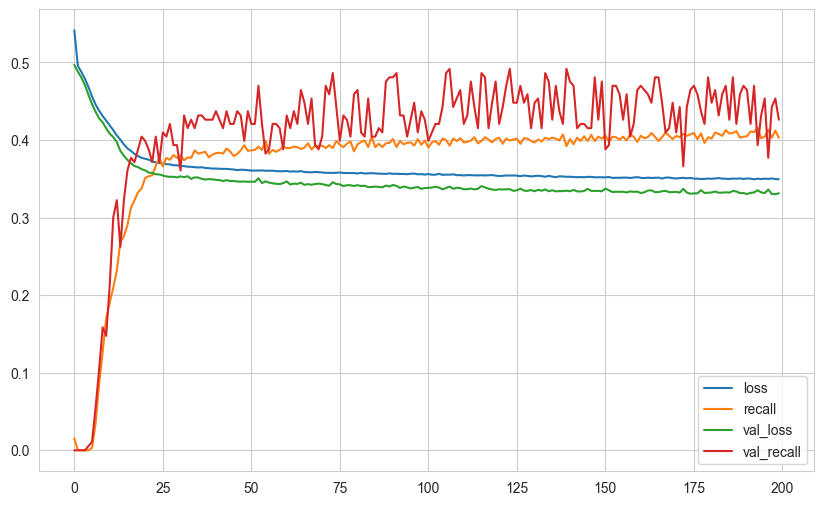

In [50]:
loss_df.plot()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [51]:
model.evaluate(X_test, y_test, verbose=0)

[0.343158483505249, 0.4019607901573181]

In [52]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("test_loss", loss)
print("test_recall", recall)

test_loss 0.343158483505249
test_recall 0.4019607901573181


In [53]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[776  20]
 [122  82]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.92       796
           1       0.80      0.40      0.54       204

    accuracy                           0.86      1000
   macro avg       0.83      0.69      0.73      1000
weighted avg       0.85      0.86      0.84      1000



32/32 [==============================] - 0s 873us/step


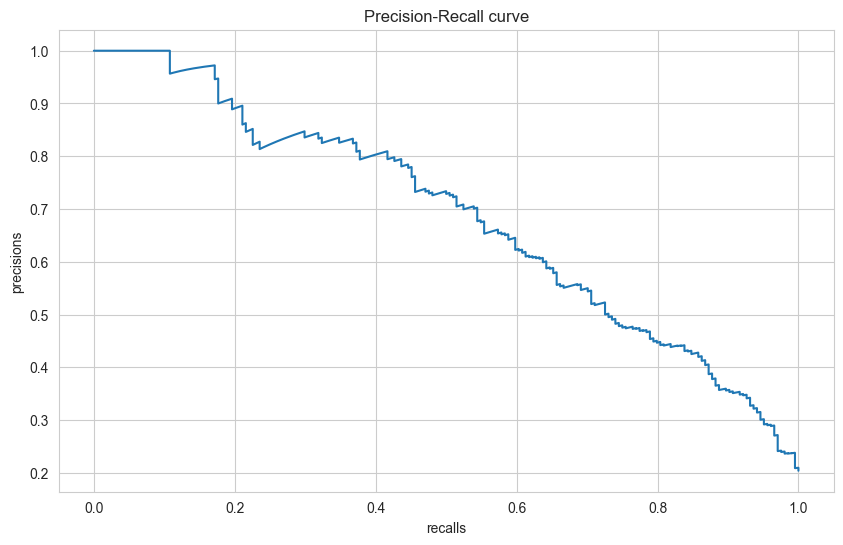

In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve');

In [55]:
average_precision_score(y_test, y_pred_proba)

0.6852702991732583

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [56]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [57]:
from sklearn.utils import class_weight

In [58]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [59]:
class_weights = {0: class_weights[0], 1:class_weights[1]}

In [60]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [61]:
model.fit(x=X_train, y=y_train,validation_split=0.1, class_weight=class_weights, batch_size=64,verbose=1,epochs=200)

Epoch 1/200
127/127 [==============================] - 1s 4ms/step - loss: 0.6815 - recall: 0.8636 - val_loss: 0.7107 - val_recall: 0.7213
Epoch 2/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6587 - recall: 0.7012 - val_loss: 0.6941 - val_recall: 0.6667
Epoch 3/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6428 - recall: 0.6667 - val_loss: 0.6758 - val_recall: 0.6721
Epoch 4/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6281 - recall: 0.6861 - val_loss: 0.6700 - val_recall: 0.6995
Epoch 5/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6149 - recall: 0.6861 - val_loss: 0.6737 - val_recall: 0.7377
Epoch 6/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6035 - recall: 0.6824 - val_loss: 0.6379 - val_recall: 0.7049
Epoch 7/200
127/127 [==============================] - 0s 3ms/step - loss: 0.5911 - recall: 0.6842 - val_loss: 0.6423 - val_recall: 0.7705
Epoch 8/200
127/127 [======

127/127 [==============================] - 0s 4ms/step - loss: 0.4950 - recall: 0.7242 - val_loss: 0.4828 - val_recall: 0.7541
Epoch 60/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4951 - recall: 0.7170 - val_loss: 0.4826 - val_recall: 0.7869
Epoch 61/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4968 - recall: 0.7121 - val_loss: 0.5173 - val_recall: 0.8197
Epoch 62/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4944 - recall: 0.7267 - val_loss: 0.4763 - val_recall: 0.7705
Epoch 63/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4944 - recall: 0.7224 - val_loss: 0.4759 - val_recall: 0.7705
Epoch 64/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4950 - recall: 0.7170 - val_loss: 0.4536 - val_recall: 0.7541
Epoch 65/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4937 - recall: 0.7133 - val_loss: 0.4644 - val_recall: 0.7650
Epoch 66/200
127/127 [===========

127/127 [==============================] - 0s 4ms/step - loss: 0.4846 - recall: 0.7315 - val_loss: 0.4309 - val_recall: 0.7486
Epoch 118/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4851 - recall: 0.7242 - val_loss: 0.4682 - val_recall: 0.7923
Epoch 119/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4847 - recall: 0.7376 - val_loss: 0.4478 - val_recall: 0.7541
Epoch 120/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4841 - recall: 0.7327 - val_loss: 0.4790 - val_recall: 0.7923
Epoch 121/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4848 - recall: 0.7236 - val_loss: 0.4920 - val_recall: 0.8142
Epoch 122/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4836 - recall: 0.7236 - val_loss: 0.4490 - val_recall: 0.7869
Epoch 123/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4839 - recall: 0.7285 - val_loss: 0.4484 - val_recall: 0.7596
Epoch 124/200
127/127 [====

127/127 [==============================] - 0s 4ms/step - loss: 0.4756 - recall: 0.7388 - val_loss: 0.4910 - val_recall: 0.8087
Epoch 176/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4772 - recall: 0.7418 - val_loss: 0.4499 - val_recall: 0.7814
Epoch 177/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4769 - recall: 0.7218 - val_loss: 0.4564 - val_recall: 0.7760
Epoch 178/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4761 - recall: 0.7376 - val_loss: 0.4257 - val_recall: 0.7596
Epoch 179/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4770 - recall: 0.7376 - val_loss: 0.4763 - val_recall: 0.8033
Epoch 180/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4764 - recall: 0.7358 - val_loss: 0.4196 - val_recall: 0.7213
Epoch 181/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4765 - recall: 0.7279 - val_loss: 0.4445 - val_recall: 0.7705
Epoch 182/200
127/127 [====

In [150]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

TypeError: no numeric data to plot

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [63]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [64]:
model.evaluate(X_test, y_test, verbose=0)

[0.49207237362861633, 0.7745097875595093]

In [65]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("Test_loss : ", loss)
print("Test_Recall : ", recall)

Test_loss :  0.49207237362861633
Test_Recall :  0.7745097875595093


In [66]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[602 194]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.83       796
           1       0.45      0.77      0.57       204

    accuracy                           0.76      1000
   macro avg       0.69      0.77      0.70      1000
weighted avg       0.83      0.76      0.78      1000



32/32 [==============================] - 0s 1ms/step


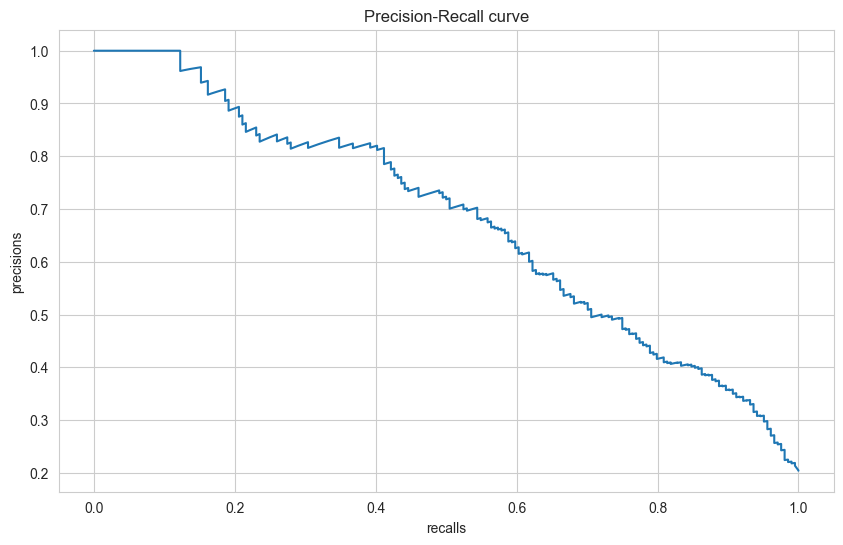

In [67]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve');

In [68]:
average_precision_score(y_test,y_pred_proba)

0.6781987032940288

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [69]:
from tensorflow.keras.layers import Dropout

### Add Dropout Layer

In [70]:
model = Sequential()
model.add(Dense(12, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.25))
model.add(Dense(6, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(lr = 0.001) # default 
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [71]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 200, verbose = 1, class_weight=class_weights)

Epoch 1/200
127/127 [==============================] - 1s 5ms/step - loss: 0.6969 - recall: 0.5188 - val_loss: 0.6747 - val_recall: 0.4699
Epoch 2/200
127/127 [==============================] - 0s 4ms/step - loss: 0.6850 - recall: 0.5079 - val_loss: 0.6500 - val_recall: 0.4699
Epoch 3/200
127/127 [==============================] - 0s 4ms/step - loss: 0.6768 - recall: 0.6121 - val_loss: 0.6600 - val_recall: 0.6557
Epoch 4/200
127/127 [==============================] - 0s 4ms/step - loss: 0.6731 - recall: 0.6485 - val_loss: 0.6510 - val_recall: 0.6448
Epoch 5/200
127/127 [==============================] - 0s 4ms/step - loss: 0.6617 - recall: 0.6552 - val_loss: 0.6301 - val_recall: 0.6175
Epoch 6/200
127/127 [==============================] - 1s 4ms/step - loss: 0.6505 - recall: 0.6303 - val_loss: 0.6448 - val_recall: 0.6667
Epoch 7/200
127/127 [==============================] - 1s 4ms/step - loss: 0.6463 - recall: 0.6497 - val_loss: 0.6306 - val_recall: 0.6667
Epoch 8/200
127/127 [======

127/127 [==============================] - 0s 4ms/step - loss: 0.5365 - recall: 0.6964 - val_loss: 0.4826 - val_recall: 0.7814
Epoch 60/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5335 - recall: 0.7006 - val_loss: 0.4829 - val_recall: 0.7923
Epoch 61/200
127/127 [==============================] - 0s 3ms/step - loss: 0.5307 - recall: 0.6897 - val_loss: 0.4684 - val_recall: 0.7541
Epoch 62/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5311 - recall: 0.6764 - val_loss: 0.4907 - val_recall: 0.7869
Epoch 63/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5317 - recall: 0.7097 - val_loss: 0.4914 - val_recall: 0.7869
Epoch 64/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5314 - recall: 0.7370 - val_loss: 0.4740 - val_recall: 0.7814
Epoch 65/200
127/127 [==============================] - 0s 3ms/step - loss: 0.5275 - recall: 0.7248 - val_loss: 0.4897 - val_recall: 0.7978
Epoch 66/200
127/127 [===========

127/127 [==============================] - 0s 4ms/step - loss: 0.5119 - recall: 0.7158 - val_loss: 0.4444 - val_recall: 0.7705
Epoch 118/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5178 - recall: 0.6945 - val_loss: 0.4618 - val_recall: 0.7869
Epoch 119/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5154 - recall: 0.7012 - val_loss: 0.4629 - val_recall: 0.7869
Epoch 120/200
127/127 [==============================] - 0s 3ms/step - loss: 0.5165 - recall: 0.7139 - val_loss: 0.4601 - val_recall: 0.7814
Epoch 121/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5124 - recall: 0.7000 - val_loss: 0.4535 - val_recall: 0.7650
Epoch 122/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5137 - recall: 0.7079 - val_loss: 0.4634 - val_recall: 0.7814
Epoch 123/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5186 - recall: 0.7000 - val_loss: 0.4680 - val_recall: 0.7869
Epoch 124/200
127/127 [====

127/127 [==============================] - 0s 4ms/step - loss: 0.5101 - recall: 0.7061 - val_loss: 0.4488 - val_recall: 0.7705
Epoch 176/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5248 - recall: 0.6933 - val_loss: 0.4568 - val_recall: 0.7760
Epoch 177/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5094 - recall: 0.6891 - val_loss: 0.4725 - val_recall: 0.7923
Epoch 178/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5172 - recall: 0.6915 - val_loss: 0.4534 - val_recall: 0.7814
Epoch 179/200
127/127 [==============================] - 0s 3ms/step - loss: 0.5125 - recall: 0.6970 - val_loss: 0.4455 - val_recall: 0.7596
Epoch 180/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5104 - recall: 0.6982 - val_loss: 0.4675 - val_recall: 0.7814
Epoch 181/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5173 - recall: 0.6903 - val_loss: 0.4865 - val_recall: 0.7814
Epoch 182/200
127/127 [====

<Axes: >

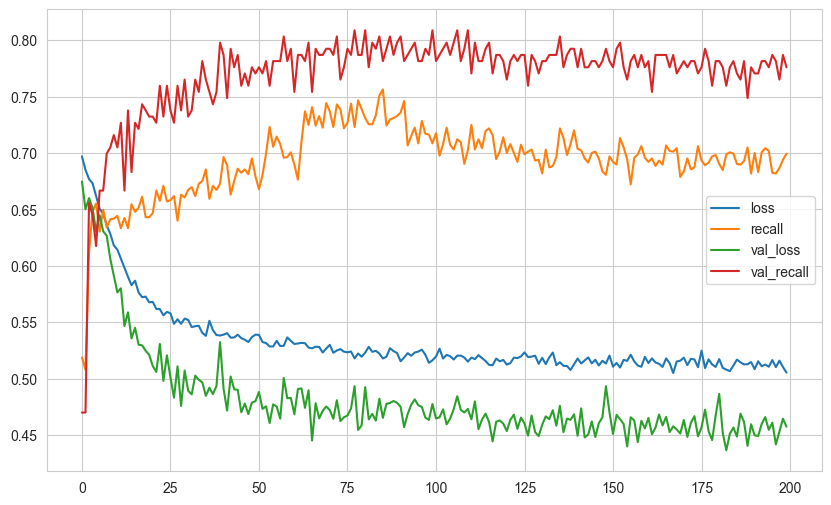

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [73]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("Test_loss : ", loss)
print("Test_Recall : ", recall)

Test_loss :  0.47341111302375793
Test_Recall :  0.7303921580314636


In [74]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[634 162]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       796
           1       0.48      0.73      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.76      0.72      1000
weighted avg       0.83      0.78      0.80      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [75]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [76]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",verbose=1,patience=25, restore_best_weights = True)

In [77]:
model.fit(x=X_train, y=y_train,validation_split=0.1, batch_size=64,verbose=1,epochs=200,  callbacks=[early_stop], class_weight=class_weights)

Epoch 1/200
127/127 [==============================] - 1s 5ms/step - loss: 0.7026 - recall: 0.7406 - val_loss: 0.7095 - val_recall: 0.6230
Epoch 2/200
127/127 [==============================] - 0s 4ms/step - loss: 0.6815 - recall: 0.6109 - val_loss: 0.6752 - val_recall: 0.6120
Epoch 3/200
127/127 [==============================] - 0s 4ms/step - loss: 0.6676 - recall: 0.6109 - val_loss: 0.6580 - val_recall: 0.6339
Epoch 4/200
127/127 [==============================] - 0s 4ms/step - loss: 0.6461 - recall: 0.6648 - val_loss: 0.6406 - val_recall: 0.6831
Epoch 5/200
127/127 [==============================] - 0s 4ms/step - loss: 0.6240 - recall: 0.6715 - val_loss: 0.5949 - val_recall: 0.6667
Epoch 6/200
127/127 [==============================] - 1s 4ms/step - loss: 0.6087 - recall: 0.6764 - val_loss: 0.6248 - val_recall: 0.7596
Epoch 7/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5994 - recall: 0.6764 - val_loss: 0.5896 - val_recall: 0.7268
Epoch 8/200
127/127 [======

127/127 [==============================] - 0s 4ms/step - loss: 0.4907 - recall: 0.7430 - val_loss: 0.4960 - val_recall: 0.8197
Epoch 60/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4915 - recall: 0.7376 - val_loss: 0.4628 - val_recall: 0.7869
Epoch 61/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4912 - recall: 0.7321 - val_loss: 0.4446 - val_recall: 0.7760
Epoch 62/200
127/127 [==============================] - 0s 4ms/step - loss: 0.4913 - recall: 0.7382 - val_loss: 0.4248 - val_recall: 0.7760
Epoch 63/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4905 - recall: 0.7400 - val_loss: 0.4354 - val_recall: 0.7814
Epoch 64/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4904 - recall: 0.7376 - val_loss: 0.4431 - val_recall: 0.7705
Epoch 65/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4894 - recall: 0.7418 - val_loss: 0.4324 - val_recall: 0.7596
Epoch 66/200
127/127 [===========

<Axes: >

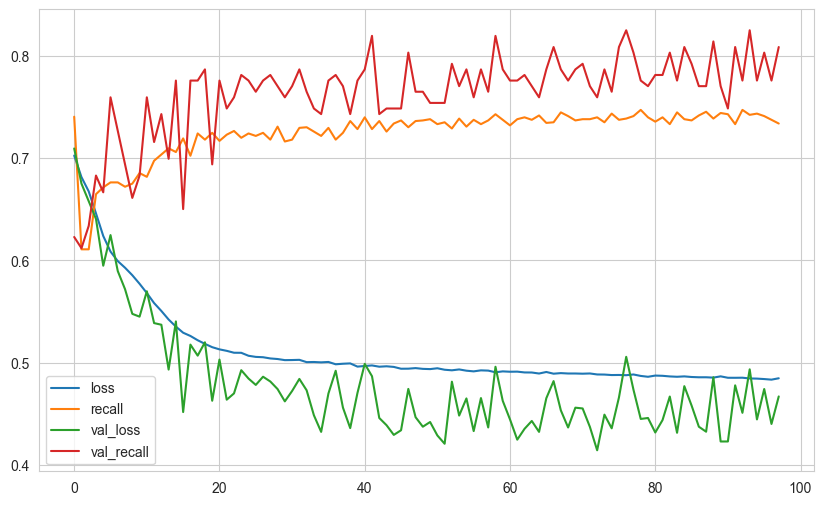

In [78]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [79]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 897us/step
[[653 143]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       796
           1       0.49      0.68      0.57       204

    accuracy                           0.79      1000
   macro avg       0.70      0.75      0.72      1000
weighted avg       0.82      0.79      0.80      1000



#### Monitor the "val_recall" as metric

In [80]:
model = Sequential()
model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation  = "sigmoid"))
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [81]:
early_stop = EarlyStopping(monitor="val_recall", mode="max",verbose=1, patience=20, restore_best_weights = True)

In [82]:
model.fit(x=X_train, y=y_train,validation_split=0.1, batch_size=64,verbose=1,epochs=200, callbacks=[early_stop],class_weight=class_weights)

Epoch 1/200
127/127 [==============================] - 1s 4ms/step - loss: 0.7045 - recall: 0.8388 - val_loss: 0.6514 - val_recall: 0.3989
Epoch 2/200
127/127 [==============================] - 0s 4ms/step - loss: 0.6676 - recall: 0.5248 - val_loss: 0.6584 - val_recall: 0.6612
Epoch 3/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6487 - recall: 0.6158 - val_loss: 0.6113 - val_recall: 0.6120
Epoch 4/200
127/127 [==============================] - 0s 4ms/step - loss: 0.6235 - recall: 0.6533 - val_loss: 0.5881 - val_recall: 0.6831
Epoch 5/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6098 - recall: 0.6921 - val_loss: 0.5740 - val_recall: 0.6831
Epoch 6/200
127/127 [==============================] - 0s 3ms/step - loss: 0.6011 - recall: 0.6903 - val_loss: 0.6009 - val_recall: 0.7650
Epoch 7/200
127/127 [==============================] - 0s 4ms/step - loss: 0.5962 - recall: 0.6952 - val_loss: 0.6183 - val_recall: 0.7596
Epoch 8/200
127/127 [======

Epoch 58: early stopping


<Axes: >

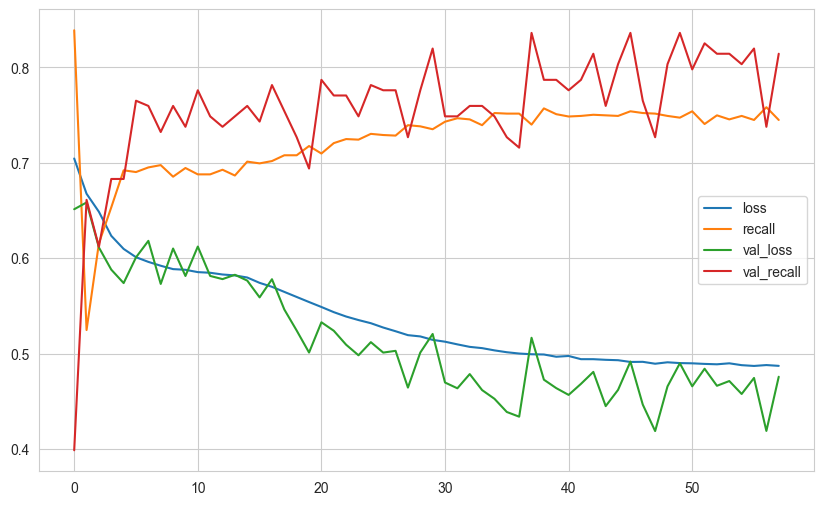

In [83]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [84]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[556 240]
 [ 38 166]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       796
           1       0.41      0.81      0.54       204

    accuracy                           0.72      1000
   macro avg       0.67      0.76      0.67      1000
weighted avg       0.83      0.72      0.75      1000



## Optuna

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___